In [1]:
import warnings
import os
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

# Load FICO HELOC data with special values converted to np.nan
path="D:/projects/XAI-finance2/heloc_dataset_v1.csv"
df= pd.read_csv(path)

df



RiskPerformance  ExternalRiskEstimate  MSinceOldestTradeOpen  \
0                 Bad                    55                    144   
1                 Bad                    61                     58   
2                 Bad                    67                     66   
3                 Bad                    66                    169   
4                 Bad                    81                    333   
...               ...                   ...                    ...   
10454            Good                    73                    131   
10455             Bad                    65                    147   
10456             Bad                    74                    129   
10457             Bad                    72                    234   
10458             Bad                    66                     28   

       MSinceMostRecentTradeOpen  AverageMInFile  NumSatisfactoryTrades  \
0                              4              84                     20   
1                             15              41                      2   
2                              5              24                      9   
3                              1              73                     28   
4                             27             132                     12   
...                          ...             ...                    ...   
10454                          5              57                     21   
10455                         39              68                     11   
10456                          6              64                     18   
10457                         12             113                     42   
10458                          1              17                      4   

       NumTrades60Ever2DerogPubRec  NumTrades90Ever2DerogPubRec  \
0                                3                            0   
1                                4                            4   
2                                0                            0   
3                                1                            1   
4                                0                            0   
...                            ...                          ...   
10454                            0                            0   
10455                            0                            0   
10456                            1                            1   
10457                            2                            2   
10458                            0                            0   

       PercentTradesNeverDelq  MSinceMostRecentDelq  ...  \
0                          83                     2  ...   
1                         100                    -7  ...   
2                         100                    -7  ...   
3                          93                    76  ...   
4                         100                    -7  ...   
...                       ...                   ...  ...   
10454                      95                    80  ...   
10455                      92                    28  ...   
10456                     100                    -7  ...   
10457                      96                    35  ...   
10458                     100                    -7  ...   

       PercentInstallTrades  MSinceMostRecentInqexcl7days  NumInqLast6M  \
0                        43                             0             0   
1                        67                             0             0   
2                        44                             0             4   
3                        57                             0             5   
4                        25                             0             1   
...                     ...                           ...           ...   
10454                    19                             7             0   
10455                    42                             1             1   
10456                    33                             3      

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   RiskPerformance                     10459 non-null  object
 1   ExternalRiskEstimate                10459 non-null  int64 
 2   MSinceOldestTradeOpen               10459 non-null  int64 
 3   MSinceMostRecentTradeOpen           10459 non-null  int64 
 4   AverageMInFile                      10459 non-null  int64 
 5   NumSatisfactoryTrades               10459 non-null  int64 
 6   NumTrades60Ever2DerogPubRec         10459 non-null  int64 
 7   NumTrades90Ever2DerogPubRec         10459 non-null  int64 
 8   PercentTradesNeverDelq              10459 non-null  int64 
 9   MSinceMostRecentDelq                10459 non-null  int64 
 10  MaxDelq2PublicRecLast12M            10459 non-null  int64 
 11  MaxDelqEver                         10459 non-null  in

In [3]:
target_variable='RiskPerformance'
target_names=['Good', 'Bad']

#convert from string to numeric datatype
df.loc[df[target_variable]==target_names[1], 'Class']=0
df.loc[df[target_variable]==target_names[0], 'Class']=1
df['RiskPerformance']=df['Class'].astype(int)
df[target_variable]=df[target_variable].astype('category')

df.head()




RiskPerformance  ExternalRiskEstimate  MSinceOldestTradeOpen  \
0               0                    55                    144   
1               0                    61                     58   
2               0                    67                     66   
3               0                    66                    169   
4               0                    81                    333   

   MSinceMostRecentTradeOpen  AverageMInFile  NumSatisfactoryTrades  \
0                          4              84                     20   
1                         15              41                      2   
2                          5              24                      9   
3                          1              73                     28   
4                         27             132                     12   

   NumTrades60Ever2DerogPubRec  NumTrades90Ever2DerogPubRec  \
0                            3                            0   
1                            4                            4   
2                            0                            0   
3                            1                            1   
4                            0                            0   

   PercentTradesNeverDelq  MSinceMostRecentDelq  ...  \
0                      83                     2  ...   
1                     100                    -7  ...   
2                     100                    -7  ...   
3                      93                    76  ...   
4                     100                    -7  ...   

   MSinceMostRecentInqexcl7days  NumInqLast6M  NumInqLast6Mexcl7days  \
0                             0             0                      0   
1                             0             0                      0   
2                             0             4                      4   
3                             0             5                      4   
4                             0             1                      1   

   NetFractionRevolvingBurden  NetFractionInstallBurden  \
0                          33                        -8   
1                           0                        -8   
2                          53                        66   
3                          72                        83   
4                          51                        89   

   NumRevolvingTradesWBalance  NumInstallTradesWBalance  \
0                           8                         1   
1                           0                        -8   
2                           4                         2   
3                           6                         4   
4                           3                         1   

   NumBank2NatlTradesWHighUtilization  PercentTradesWBalance  Class  
0                                   1                     69    0.0  
1                                  -8                      0    0.0  
2                                   1                     86    0.0  
3                                   3                     91    0.0  
4                                   0                     80    0.0  

[5 rows x 25 columns]

In [4]:
df.drop('Class', axis=1)


RiskPerformance  ExternalRiskEstimate  MSinceOldestTradeOpen  \
0                   0                    55                    144   
1                   0                    61                     58   
2                   0                    67                     66   
3                   0                    66                    169   
4                   0                    81                    333   
...               ...                   ...                    ...   
10454               1                    73                    131   
10455               0                    65                    147   
10456               0                    74                    129   
10457               0                    72                    234   
10458               0                    66                     28   

       MSinceMostRecentTradeOpen  AverageMInFile  NumSatisfactoryTrades  \
0                              4              84                     20   
1                             15              41                      2   
2                              5              24                      9   
3                              1              73                     28   
4                             27             132                     12   
...                          ...             ...                    ...   
10454                          5              57                     21   
10455                         39              68                     11   
10456                          6              64                     18   
10457                         12             113                     42   
10458                          1              17                      4   

       NumTrades60Ever2DerogPubRec  NumTrades90Ever2DerogPubRec  \
0                                3                            0   
1                                4                            4   
2                                0                            0   
3                                1                            1   
4                                0                            0   
...                            ...                          ...   
10454                            0                            0   
10455                            0                            0   
10456                            1                            1   
10457                            2                            2   
10458                            0                            0   

       PercentTradesNeverDelq  MSinceMostRecentDelq  ...  \
0                          83                     2  ...   
1                         100                    -7  ...   
2                         100                    -7  ...   
3                          93                    76  ...   
4                         100                    -7  ...   
...                       ...                   ...  ...   
10454                      95                    80  ...   
10455                      92                    28  ...   
10456                     100                    -7  ...   
10457                      96                    35  ...   
10458                     100                    -7  ...   

       PercentInstallTrades  MSinceMostRecentInqexcl7days  NumInqLast6M  \
0                        43                             0             0   
1                        67                             0             0   
2                        44                             0             4   
3                        57                             0             5   
4                        25                             0             1   
...                     ...                           ...           ...   
10454                    19                             7             0   
10455                    42                             1             1   
10456                    33                             3      

In [5]:
df=df[df['ExternalRiskEstimate']!= -9]
df

RiskPerformance  ExternalRiskEstimate  MSinceOldestTradeOpen  \
0                   0                    55                    144   
1                   0                    61                     58   
2                   0                    67                     66   
3                   0                    66                    169   
4                   0                    81                    333   
...               ...                   ...                    ...   
10454               1                    73                    131   
10455               0                    65                    147   
10456               0                    74                    129   
10457               0                    72                    234   
10458               0                    66                     28   

       MSinceMostRecentTradeOpen  AverageMInFile  NumSatisfactoryTrades  \
0                              4              84                     20   
1                             15              41                      2   
2                              5              24                      9   
3                              1              73                     28   
4                             27             132                     12   
...                          ...             ...                    ...   
10454                          5              57                     21   
10455                         39              68                     11   
10456                          6              64                     18   
10457                         12             113                     42   
10458                          1              17                      4   

       NumTrades60Ever2DerogPubRec  NumTrades90Ever2DerogPubRec  \
0                                3                            0   
1                                4                            4   
2                                0                            0   
3                                1                            1   
4                                0                            0   
...                            ...                          ...   
10454                            0                            0   
10455                            0                            0   
10456                            1                            1   
10457                            2                            2   
10458                            0                            0   

       PercentTradesNeverDelq  MSinceMostRecentDelq  ...  \
0                          83                     2  ...   
1                         100                    -7  ...   
2                         100                    -7  ...   
3                          93                    76  ...   
4                         100                    -7  ...   
...                       ...                   ...  ...   
10454                      95                    80  ...   
10455                      92                    28  ...   
10456                     100                    -7  ...   
10457                      96                    35  ...   
10458                     100                    -7  ...   

       MSinceMostRecentInqexcl7days  NumInqLast6M  NumInqLast6Mexcl7days  \
0                                 0             0                      0   
1                                 0             0                      0   
2                                 0             4                      4   
3                                 0             5                      4   
4                                 0             1                      1   
...                             ...           ...                    ...   
10454                             7             0                      0   
10455                             1             1                      1   
10456                             3             4     

In [6]:
import seaborn as sns

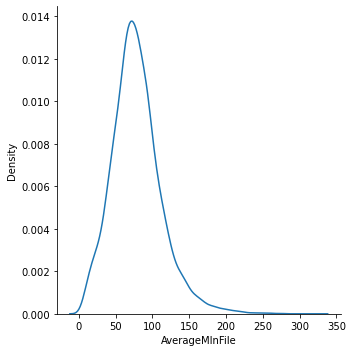

In [7]:
sns.displot(df, x="AverageMInFile", kind="kde")

In [8]:
df.describe()

ExternalRiskEstimate  MSinceOldestTradeOpen  MSinceMostRecentTradeOpen  \
count           9861.000000            9861.000000                9861.000000   
mean              72.060440             195.765947                   9.520535   
std                9.871795             101.913629                  12.288235   
min               33.000000              -8.000000                   0.000000   
25%               64.000000             131.000000                   3.000000   
50%               72.000000             183.000000                   6.000000   
75%               80.000000             255.000000                  12.000000   
max               94.000000             803.000000                 227.000000   

       AverageMInFile  NumSatisfactoryTrades  NumTrades60Ever2DerogPubRec  \
count     9861.000000            9861.000000                  9861.000000   
mean        78.744245              21.130413                     0.580570   
std         33.904646              11.302849                     1.238056   
min          4.000000               0.000000                     0.000000   
25%         57.000000              13.000000                     0.000000   
50%         76.000000              20.000000                     0.000000   
75%         97.000000              28.000000                     1.000000   
max        322.000000              79.000000                    19.000000   

       NumTrades90Ever2DerogPubRec  PercentTradesNeverDelq  \
count                  9861.000000              9861.00000   
mean                      0.383734                92.35899   
std                       0.991851                11.76934   
min                       0.000000                 0.00000   
25%                       0.000000                89.00000   
50%                       0.000000                97.00000   
75%                       0.000000               100.00000   
max                      19.000000               100.00000   

       MSinceMostRecentDelq  MaxDelq2PublicRecLast12M  ...  \
count           9861.000000               9861.000000  ...   
mean               7.709157                  5.758138  ...   
std               20.735160                  1.641567  ...   
min               -8.000000                  0.000000  ...   
25%               -7.000000                  5.000000  ...   
50%                0.000000                  6.000000  ...   
75%               15.000000                  7.000000  ...   
max               83.000000                  9.000000  ...   

       MSinceMostRecentInqexcl7days  NumInqLast6M  NumInqLast6Mexcl7days  \
count                   9861.000000   9861.000000            9861.000000   
mean                       0.192475      1.455532               1.396714   
std                        5.855050      2.135229               2.095491   
min                       -8.000000      0.000000               0.000000   
25%                        0.000000      0.000000               0.000000   
50%                        0.000000      1.000000               1.000000   
75%                        1.000000      2.000000               2.000000   
max                       24.000000     66.000000              66.000000   

       NetFractionRevolvingBurden  NetFractionInstallBurden  \
count                 9861.000000               9861.000000   
mean                    34.084170                 42.048981   
std                     29.202295                 41.605560   
min                     -8.000000                 -8.000000   
25%                      8.000000                 -8.000000   
50%                     28.000000                 52.000000   
75%                     56.000000                 80.000000   
max                    232.000000                471.000000   

       NumRevolvingTradesWBalance  NumInstallTradesWBalance  \
count                 9861.000000               9861.000000   
mean                     3.919075                  1.577021   
std                    

## Categorical values

MaxDelqEver	
  
  
	
1   No such value  

2	derogatory comment  

3	120+ days delinquent  

4	90 days delinquent  

5	60 days delinquent  

6	30 days delinquent  

7	unknown delinquency  

8	current and never delinquent  

9	all other


<AxesSubplot:xlabel='MaxDelqEver', ylabel='Count'>

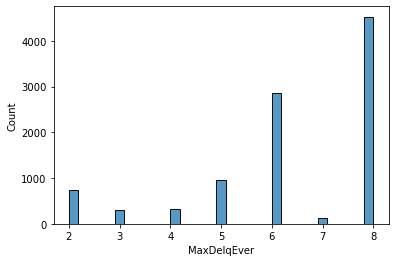

In [9]:
sns.histplot(data=df, x="MaxDelqEver")

KeyboardInterrupt: 

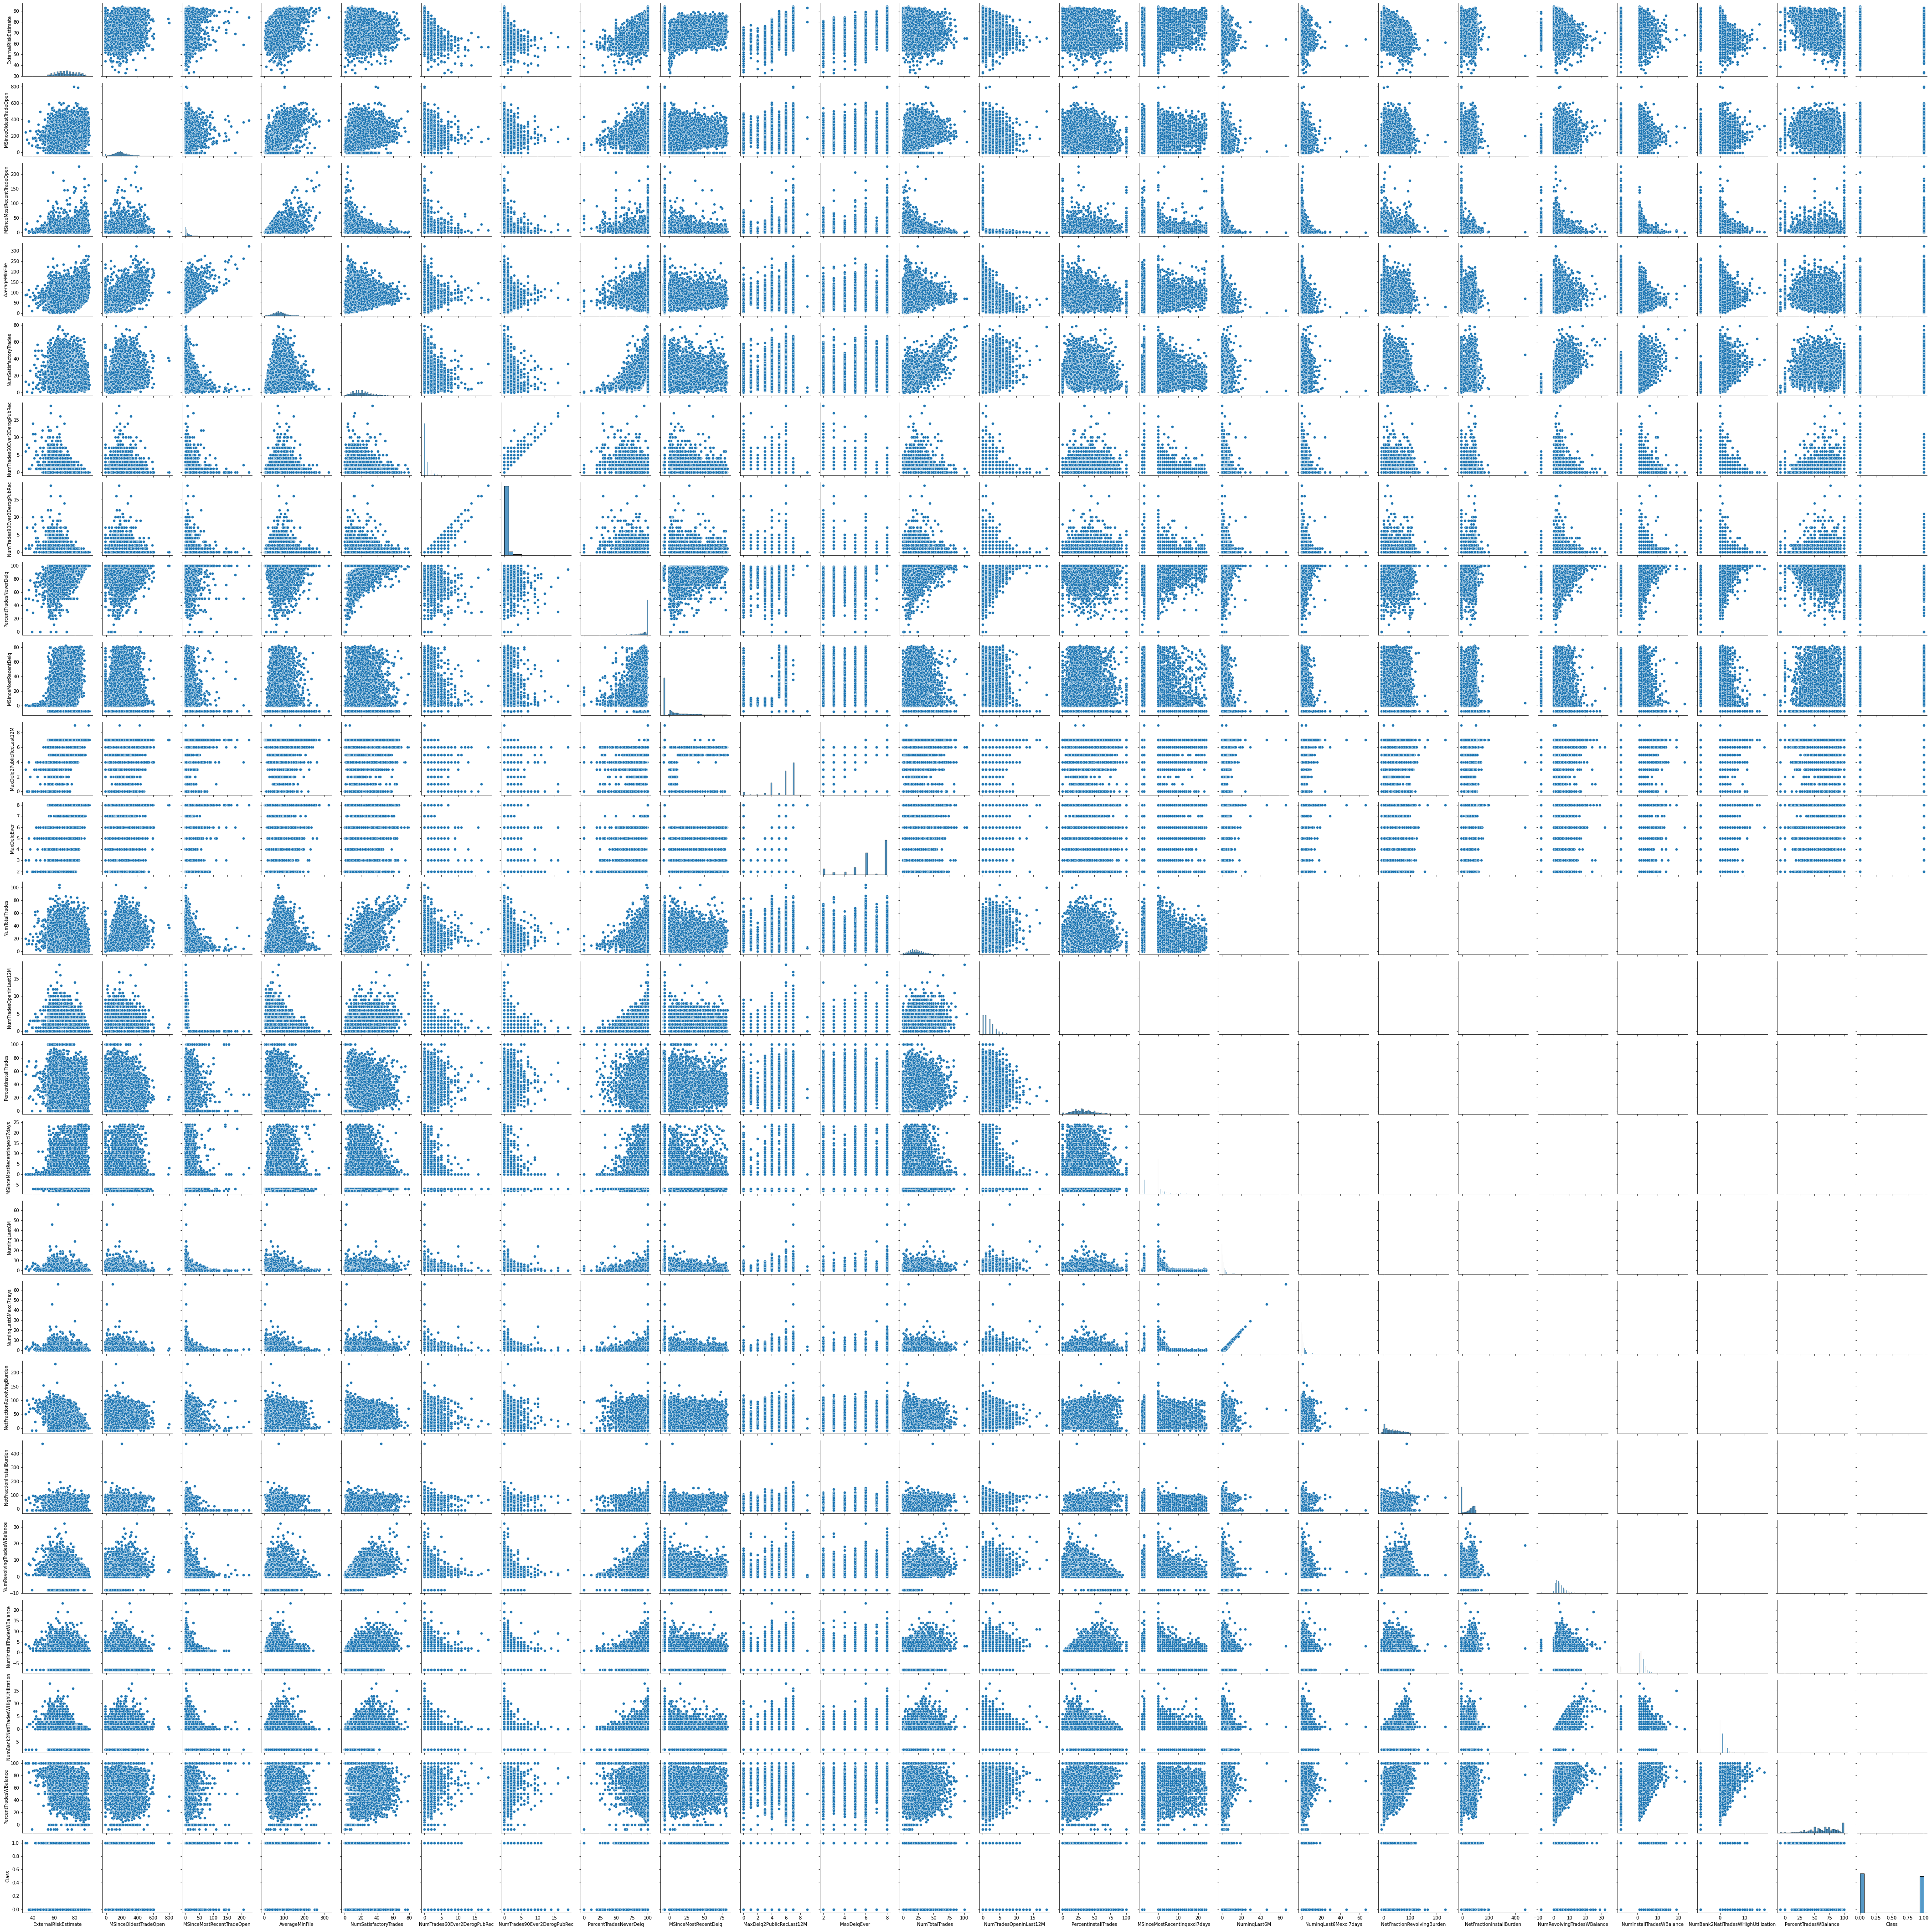

In [13]:
sns.pairplot(df)

In [21]:
df2 =df[df['NumBank2NatlTradesWHighUtilization']!= -8]
df2['NumBank2NatlTradesWHighUtilization'].median()

1.0